# GRIP : The Sparks Foundation
# Data Science and Business Analytics Intern
# Submitted By: Muhammad Hassan
# Prediction Using Supervised Machince Learning

# Problem Statement: 
This task requires the prediction of a student's percentage based on the number of hours studied. The given dataset contains the two variables. The input variable (x) represents the number of hours studied while the output variable (y) represents the correponding percantage. This problem contains the supervised data and can be solved using the simple linear regression method.

# Importing Libraries

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #used for plotting
#for displaying inline plots
%matplotlib inline 

# Reading the Dataset

In [2]:
#Reading the given dataset from the url
url = "http://bit.ly/w-data" 
data = pd.read_csv(url) #importing dataset from the given url
print(data.shape)  #checking the shape of the data

(25, 2)


In [3]:
data.head(10) #printing the first 10 rows of data to check whether the data is imported correctly or not 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#Getting the relevant information about the data like data type, memory usage, etc. 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Plotting the Dataset

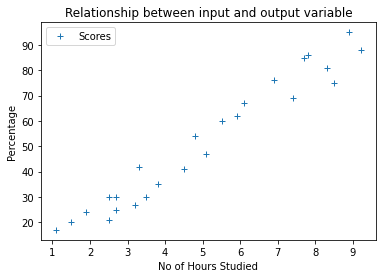

In [5]:
#Plotting the data to see the relationship between the two variables
data.plot(x="Hours",y="Scores",style="+")
plt.title("Relationship between input and output variable")
plt.xlabel("No of Hours Studied")
plt.ylabel("Percentage")
plt.show()

The above plot shows the positive linear relationship between the no of hours studied and the percentage.

In [6]:
#Finding the correlation co-efficient to further validate the relationship 
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The correlation co-efficient of 0.976191 is close to 1 showing the positive linear relationship.

# Dividing the Dataset

In [7]:
#Dividing the dataset into attributes and labels
X = data.iloc[:,:-1] #attributes (it will select the columns upto the second last column)
y = data.iloc[:,1] #labels (it will select the second column)

# Splitting the Dataset into Train and Test sets

In [8]:
#Importing the scikit learn library and its function train_test_split()
#it is used to avoid the use of same data for training and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #keeping the ratio of 80-20
#and the random state to 0, so that the split will remain the same 

# Training the Dataset

In [9]:
#Importing the linear regression model because of the linear data to predict the percentage
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)  #fit() function is used to fit our training data and to train the model

LinearRegression()

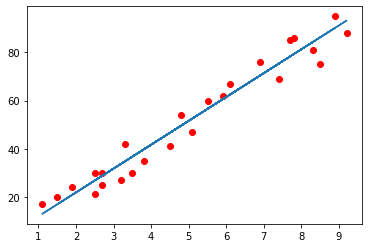

In [14]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X,y,color='r') #plotting the variables points
plt.plot(X,line) #plotting the line
plt.show()

# Making the Predictions

In [15]:
#Making the predictions and comparing it with the actual values
print(X_test)
pred = regressor.predict(X_test) #making predictions
df = pd.DataFrame({'Actual':y_test,'Predicted':pred}) #comparing the predicted and the actual data
df

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# Testing with Data of Choice

In [28]:
# You can also test with your own data
hours = [[9.75],[9.25]]
my_pred = regressor.predict(hours)
print("Percentage if a student studies 9.75 hours a day = {}".format(my_pred[0]))

Percentage if a student studies 9.75 hours a day = 98.64706072769648


# Evaluating the Model

In [29]:
#Finding the mean absolute error (average of the absolute error) to evaluate the model
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,pred))

Mean Absolute Error:  4.183859899002975
